In [86]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns

load = pd.read_csv("creditcard.csv")
df = pd.DataFrame(data=load)

y = df['Class']
X = df[list(df.columns[:-1])]

display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


We have a non-uniformly elaborated dataset. From the content's caption, we got a dataframe in which we have 28 indipendent variables changed by PCA and 2 variable as raw data. It means we have to standardize these variable. So let's see if we can use a *StandardScaler()* or something more resistent to outliers. 

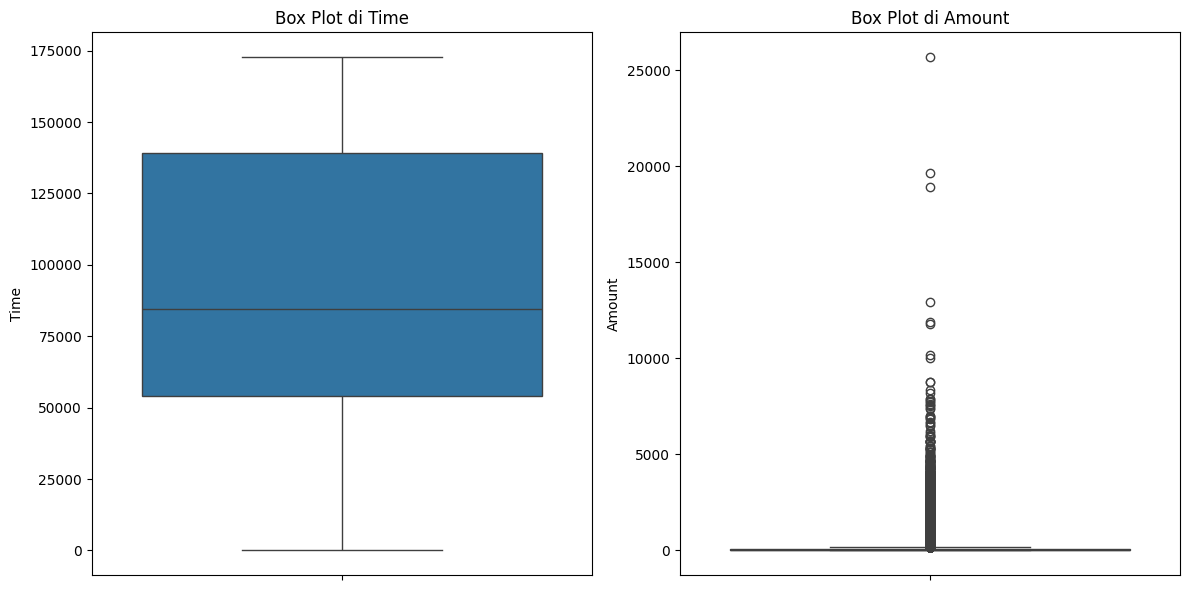

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

data_to_plot = X[['Time', 'Amount']]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data_to_plot['Time'])
plt.title('Box Plot di Time')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_to_plot['Amount'])
plt.title('Box Plot di Amount')

plt.tight_layout()
plt.show()


In this case, as 'Amount' is definetly shaped on outliers (indicated as points/circles in the boxplot), we can use the function *RobustScaler()*.  
Then we can apply PCA on the entire dataframe.

In [93]:
from sklearn.preprocessing import RobustScaler
Standard_X=pd.concat([pd.DataFrame(RobustScaler().fit_transform(X.loc[:, ['Time', 'Amount']]), columns=['Time','Amount']),
                       X.drop(columns=['Time','Amount']).reset_index(drop=True)],axis=1)
Standard_X['Amount']=Standard_X.pop('Amount')

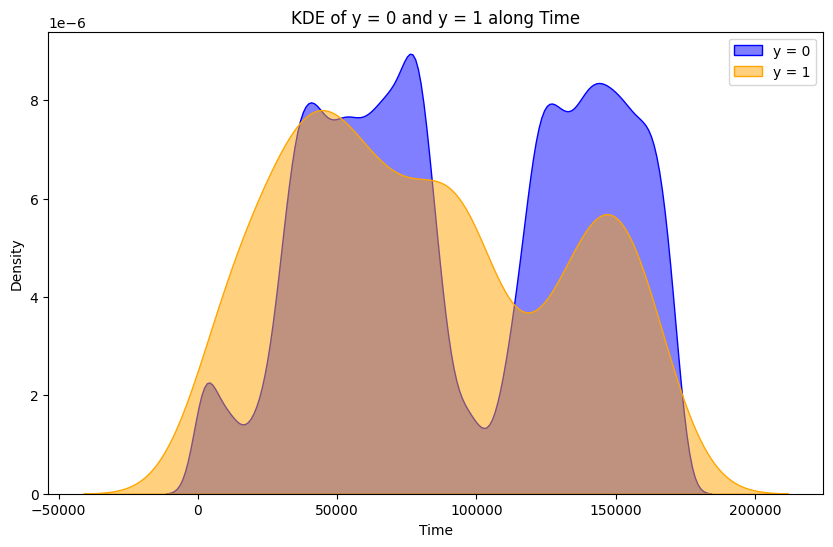

In [82]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Class'] == 0]['Time'], label='y = 0', fill=True, color='blue', alpha=0.5)

sns.kdeplot(df[df['Class'] == 1]['Time'], label='y = 1', fill=True, color='orange', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Density')
plt.title('KDE of y = 0 and y = 1 along Time')
plt.legend()

plt.show()

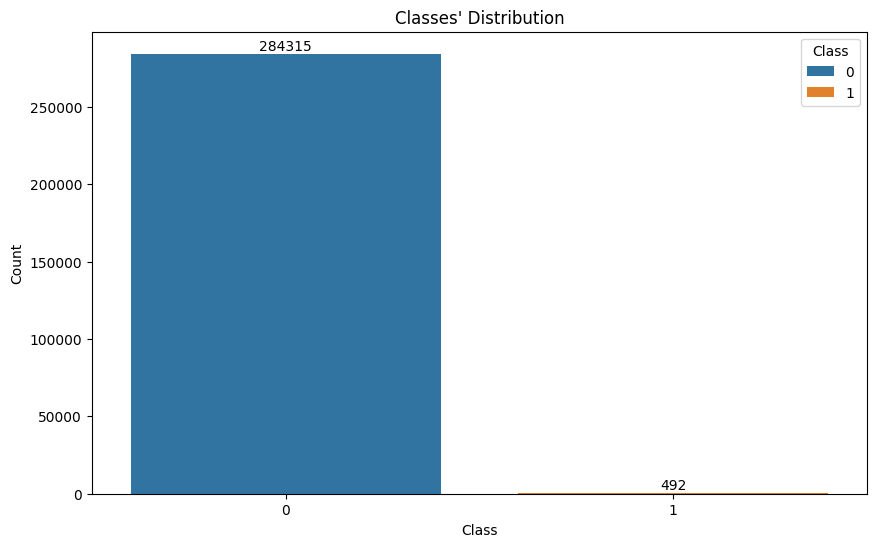

In [83]:
class_counts = df['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']


plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_counts, hue='Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Classes' Distribution")

for i, count in enumerate(class_counts['Count']):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.show()

We have an imbalanced dataset.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(Standard_X, y, stratify=y, random_state=0)

forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.999
